## 可视化三维样本数据点的PCA过程

In [1]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

# 在三维空间随机生成100个样本点
np.random.seed(8888)
X_random = np.random.random(size=(100, 3))

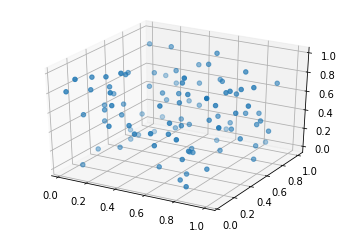

In [2]:
ax = plt.axes(projection='3d')
ax.scatter3D(X_random[:,0], X_random[:,1], X_random[:,2])
plt.show()

### demean

In [3]:
def demean(X):
    return X - np.mean(X, axis=0)

X_demean = demean(X_random)

NameError: name 'X' is not defined

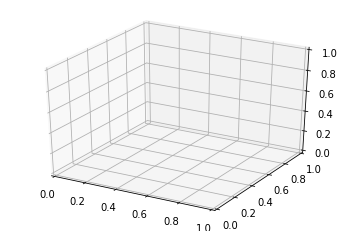

In [4]:
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], X[:,2])
plt.show()

### PCA

In [ ]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def direction(w):
    return w / np.linalg.norm(w)

def first_component(X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    w = direction(initial_w) 
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) 
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1

    return w

In [ ]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w1 = first_component(X, initial_w, eta) 
w1 # 求出第一主成分

In [ ]:
# 将原来的所有样本点X去除在第一主成分上的分量，得到X2
X2 = np.empty(X_demean.shape)
for i in range(len(X)):
    X2[i] = X[i] - X[i].dot(w1) * w1

In [ ]:
# 绘制X2，此时，X2的所有样本点分布在一个平面上
ax = plt.axes(projection='3d')
ax.scatter3D(X2[:,0], X2[:,1], X2[:,2])
plt.show()

In [ ]:
w2 = first_component(X2, initial_w, eta)
w2 # 求出第二主成分

In [ ]:
# 将X2去除在第二主成分上的分量，得到X3
X3 = np.empty(X2.shape)
for i in range(len(X)):
    X3[i] = X2[i] - X2[i].dot(w2) * w2

In [ ]:
# 绘制X3，此时，X3的所有样本点分布在一条直线上
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:,0], X3[:,1], X3[:,2])
plt.show()